# TP: Applying Arora's Method for Sentence Embeddings

* Master 1 – MIASHS, Université Lyon 2  
* December 2025  


## Objectives

**Global goal:** Build a model that takes an SMS message as input and predicts whether it is **spam** or **not spam**.  
To achieve this, you will compute sentence embeddings using the method proposed by Arora *et al.* (2017):  
https://openreview.net/forum?id=SyK00v5xx

**Steps of the practical session:**

1. Download the **SMS Spam Collection Dataset**:  
   https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

2. Extract **word embeddings** for each observation using **Gensim Word2Vec**, forming a dictionary `{token: embedding}`.

3. Compute the **sentence embedding** $v_s^i$ for each observation using the **Arora SIF method**.

4. Train a **RandomForestClassifier**, a **Logistic Regression**, a **Neural Network** or any model you want using sentence embeddings as features.

5. Evaluate your Classifier (Precision, Recall, Accuracy, F1-score, etc.).


### Targeted Model

* $N$: dimension of the embedding space.  
* $J$: number of tokens/words in the sentence.  
* $v_s$: sentence embedding computed using the Arora method from word embeddings $(w_1, \dots, w_J)$.  
* $\delta$: binary target (1 for spam, 0 for non-spam).

The global learning pipeline is:

$$
\text{phrase} \ \xrightarrow[\mathrm{word. embd}]{\mathrm{extract.} } \quad \left(w_1, \dots, w_J \right) \in \mathbb{R}^{N \times J} \quad \xrightarrow[]{\mathrm{Arora} }  \quad v_s  \in \mathbb{R}^{N} \quad \xrightarrow[]{\boxed{ \mathrm{model} }} \quad \delta^{\text{pred}} \in \{0,1\}
$$


### Python Methods for Arora et al. (2017)

The official GitHub repository of the method is available here:  
https://github.com/PrincetonML/SIF

## I) Import Required Packages and Data
### I)1) Packages and Data

In [1]:
from tp_arora_pkg_Corr import *

In [2]:
df = load_text_classification_dataset('./spam.csv')

Loaded successfully with encoding='ISO-8859-1'.


In [3]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### I)2) Descriptive Statistics

In [4]:
stats =  descriptive_stats_text_target(df)
stats

,Type,Count,Missing,Mean length,Max length,Min length,Class frequencies
text,object,5572,0,80.12,910,2,NaN
target,int64,5572,0,NaN,NaN,NaN,"{0: 4825, 1: 747}"


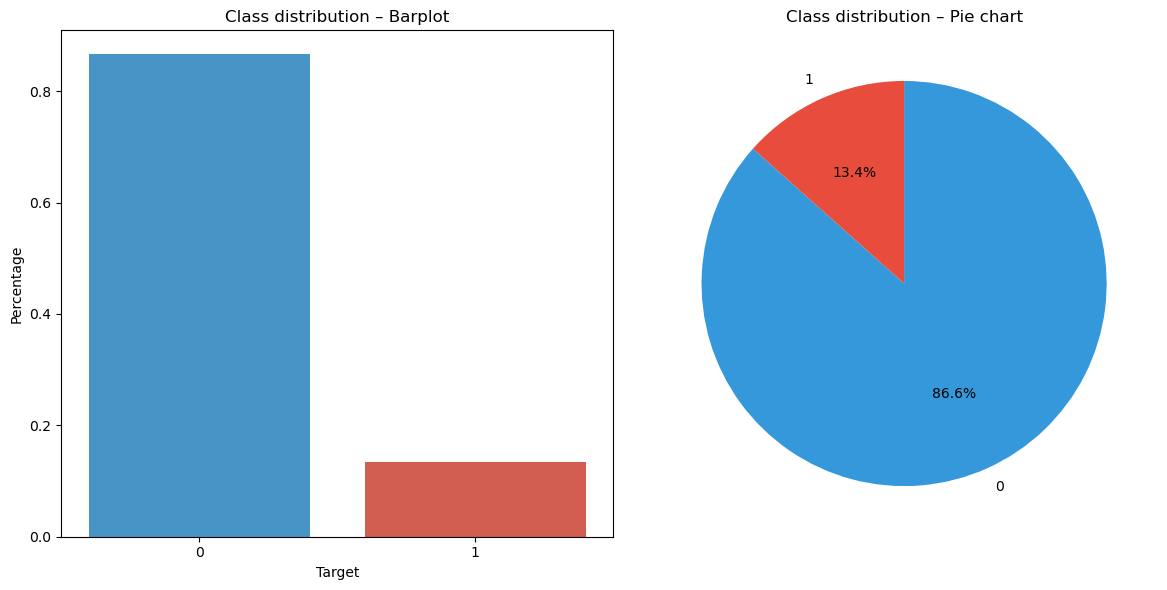

In [5]:
plot_target_distribution(df)

## II) NLP Model encoding

#### Additional Resources

Here are a few useful references to help you explore Word2Vec and word embeddings more deeply:

* https://radimrehurek.com/gensim/models/word2vec.html  
  *Official Gensim documentation for the Word2Vec model.*

* https://datascientest.com/nlp-word-embedding-word2vec  
  *A clear introduction to Word2Vec and its role in NLP.*

Feel free to explore further resources (blog posts, tutorials, videos, research papers) to better understand how word embeddings, sentence embeddings, and the Arora SIF method fit into modern NLP workflows.


### II)1) Word embeddings extraction

In [6]:
df_we = extract_word_embeddings(df)

Computing word embeddings...: 100%|██████| 5572/5572 [00:00<00:00, 44236.31it/s]


In [7]:
df_we.head()

,text,target,word_embeddings,len_dico
0,"Go until jurong point, crazy.. Available only ...",0,"{'go': [-0.46124673, 0.19521415, 0.7751164, 0....",20
1,Ok lar... Joking wif u oni...,0,"{'ok': [-0.26559094, 0.13758837, 0.4473679, 0....",6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,"{'free': [-0.4741303, 0.20480102, 0.7519498, 0...",24
3,U dun say so early hor... U c already then say...,0,"{'u': [-0.5671028, 0.2402804, 0.9677506, 1.002...",10
4,"Nah I don't think he goes to usf, he lives aro...",0,"{'nah': [-0.012257412, 0.0007983971, 0.0354050...",12


### II)2) Sentence embeddings computation

In [8]:
df_arora = arora_methods(df_we, remove_pc_nbr = 0)

Computing sentence embeddings...: 100%|██| 5572/5572 [00:00<00:00, 25327.38it/s]


In [9]:
df_arora.head(3)

,text,target,word_embeddings,len_dico,sentence_embeddings
0,"Go until jurong point, crazy.. Available only ...",0,"{'go': [-0.46124673, 0.19521415, 0.7751164, 0....",20,"[-0.0035461537799040105, 0.0017370547727206906..."
1,Ok lar... Joking wif u oni...,0,"{'ok': [-0.26559094, 0.13758837, 0.4473679, 0....",6,"[-0.0010403397457885222, 0.0004759527099222523..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,"{'free': [-0.4741303, 0.20480102, 0.7519498, 0...",24,"[-0.00470151322952006, 0.002135420485103623, 0..."


## III) Training a Classification Model

### Instructions

1. Using the sentence embeddings computed with Arora's method, build a model that predicts whether a message should be classified as **SPAM** or **not SPAM**.

   * First, **split** the dataset into a training set and a test set.  
     (What is the explanatory variable? What is the target variable?)

   * Import a classification model (RandomForest, Logistic Regression, Neural Network, or any other classifier).  
     Instantiate it and train it on the **training** portion of the dataset.

   * Evaluate the **quality** of your model by comparing predictions on the **test set** with the true labels.  
     (*Which metrics can be used for this?* Think about Accuracy, Precision, Recall, F1-score, etc.)
  

   * Display the **confusion matrix**.
  

For a complete piece of work, you should put **several models in competition** (to be as exhaustive as possible) and compare both their discrimination and calibration results in order to reach a reasonably rigorous conclusion. 

2. Suppose you have obtained a trained model `classif_spam` whose performance is satisfactory.  
   What happens when you apply it to an **external dataset**?

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [11]:
# Neural Network Classifier

clf_nn = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=177
    ))
])


# RandomForest Classifier

clf_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=177,
    n_jobs=-1   # Use all CPU cores
)


# Linear LASSO Classifier (Logistic Regression)

clf_lr = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1/1e-5, # λ_LASSO = 0.00001
    max_iter=1000,
    random_state=177
)


# Linear ElasticNet Classifier (Logistic Regression)

clf_en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.15,     # mix between L1 and L2 (0 = Ridge, 1 = LASSO)
    C=1/1e-1,         # λ = 1e-5  → C = 1/λ
    max_iter=2000,
    random_state=177
)


=== Training NeuralNetwork ===

--- Evaluation Metrics ---
Accuracy      : 0.9587
Precision     : 0.9478
Recall        : 0.7315
F1-score      : 0.8258
Brier Score   : 0.0322


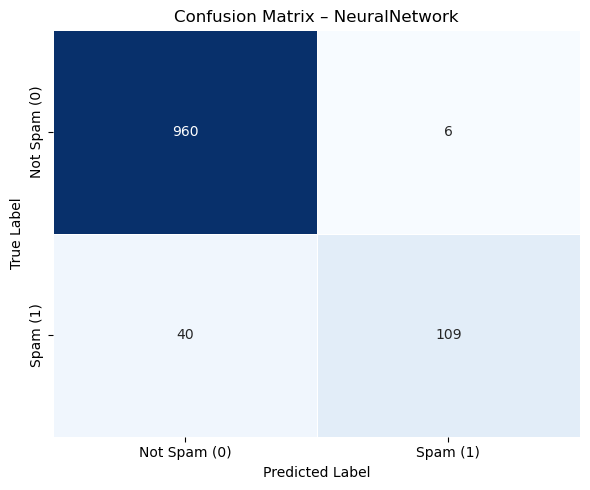


=== Training RandomForest ===

--- Evaluation Metrics ---
Accuracy      : 0.9632
Precision     : 0.9821
Recall        : 0.7383
F1-score      : 0.8429
Brier Score   : 0.0315


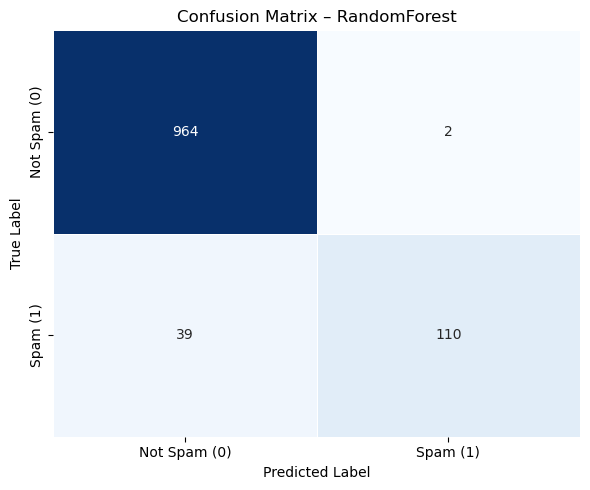


=== Training LogReg_LASSO ===

--- Evaluation Metrics ---
Accuracy      : 0.9722
Precision     : 0.9609
Recall        : 0.8255
F1-score      : 0.8881
Brier Score   : 0.0245


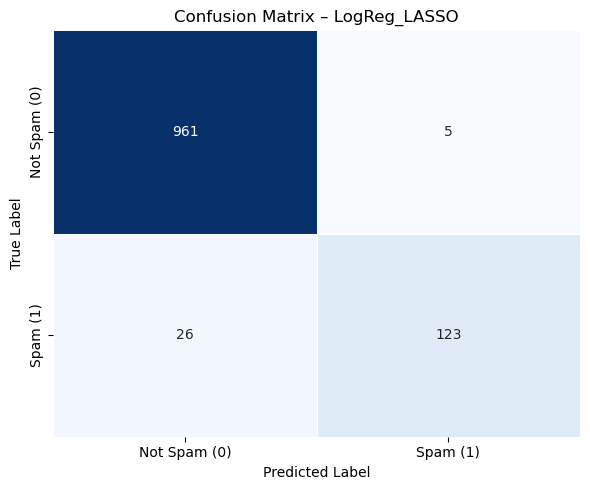

In [12]:
models = {
    "NeuralNetwork": clf_nn,
    "RandomForest": clf_rf,
    "LogReg_LASSO": clf_lr
}

pipeline = SpamClassificationPipeline(df_arora)
results_df = pipeline.run_all_models(models_dict=models, plot_confusion=True, verbose=True)

In [13]:
results_df

,model,accuracy,precision,recall,f1_score,brier_score
0,LogReg_LASSO,0.972197,0.960938,0.825503,0.888087,0.024540
1,RandomForest,0.963229,0.982143,0.738255,0.842912,0.031530
2,NeuralNetwork,0.958744,0.947826,0.731544,0.825758,0.032243


### Apply the classifier on new data

In [14]:
# Artificial dataset of new SMS
data = {
    'text': [
        'what about',
        'see the last new of our model',
        'win last phone',
        'WINNER!! As a valued network customer you have been selected to receive a price'
    ]
}

df_newdata = pd.DataFrame(data)

# --------------------------------------------------------------
# Extract embeddings and compute Arora sentence embeddings
# --------------------------------------------------------------

df_newdata = extract_word_embeddings(df_newdata)
df_newdata = arora_methods(df_newdata, remove_pc_nbr=0)

# Convert embeddings to numpy format
X_new = np.stack(df_newdata['sentence_embeddings'].values)

# --------------------------------------------------------------
# Predictions for each model
# --------------------------------------------------------------

print("\n--- Predictions on New Messages ---")

# 1. Neural Network (MLPClassifier)
y_pred_mlp = clf_nn.predict(X_new)
print("MLPClassifier predictions :", y_pred_mlp)

# 2. Random Forest
y_pred_rf = clf_rf.predict(X_new)
print("RandomForest predictions  :", y_pred_rf)

# 3. Logistic Regression with LASSO
y_pred_lr = clf_lr.predict(X_new)
print("Logistic Regression (LASSO) predictions :", y_pred_lr)

Computing sentence embeddings...: 100%|█████████| 4/4 [00:00<00:00, 4571.45it/s]


--- Predictions on New Messages ---
MLPClassifier predictions : [0 0 0 0]
RandomForest predictions  : [0 0 0 0]
Logistic Regression (LASSO) predictions : [0 0 0 0]
